In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os

In [9]:
ruta_base = '/content/drive/MyDrive/BigData/Casos de analítica/Caso 2. Sentimientos Twitter/' # Albert
#ruta_base = '/content/drive/MyDrive/Analitica_de_Datos/' # Javier
#ruta_base = '/content/drive/MyDrive/Master Big Data Engineering - Salle Barcelona/Casos de Analítica/Caso_2/' # Ruta Luis
df = pd.read_csv(ruta_base + 'training.1600000.processed.noemoticon.csv')
df.columns = ['points', 'id', 'date', 'search', 'user', 'text']
df.head(2)

,points,id,date,search,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


Columnas:
1.	**Points:** Puntuación sentimental o polaridad (-5 = negativa … 0 = neutral … 5 = positiva) (por calcular)
2.	**Id:** Id del tweet
3.	**Date:** Fecha del tweet (Sat May 16 23:58:44 UTC 2009)
4.	**Search:** Búsqueda. Si no hay búsqueda, el valor es NO_QUERY
5.	**User:** Usuario que ha tweeteado
6.	**Text:** Texto del tweet


**PREPARACIÓN DE LOS DATOS, LIMPIEZA, PREPROCESADO Y TOKENIZACIÓN**

In [ ]:
# Si la primera palabra de text empieza por @, eliminar toda la palabra
def eliminar_primera_palabra(text):
    if text[0] == '@':
        return re.sub(r'^@\w+\s', '', text)
    else:
        return text

In [ ]:
def clean_text(text):
    # Elimina caracteres de puntuación y dígitos
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d', '', text)
    # Elimina espacios adicionales
    text = re.sub(r'\s+', ' ', text)
    # Convierte el texto a minúsculas
    text = text.lower()
    return text

 [What are StopWords, why and how to remove them](https://pythonspot.com/nltk-stop-words/)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
stops = set(stopwords.words('english'))
print(stops)

def tokenize_text(text):
  words = word_tokenize(text)
  wordsFiltered = []
  for word in words:
    if word not in stops:
      wordsFiltered.append(word)
  # wordsFiltered = [word for word in words if word not in stops]
  return ' '.join(wordsFiltered)

{'some', 'here', 'of', 'if', 'against', 'under', 'nor', "haven't", "isn't", 'are', 'mightn', 'ourselves', 'by', 'both', "couldn't", 'what', "mightn't", "won't", 'while', 'be', 'on', 'there', 'which', 'ours', "you've", 'again', 'wasn', 'having', 'very', 'few', 'had', 'them', 'why', 'don', 'out', 've', 'their', 'is', 'themselves', 'then', 'each', 'all', 'itself', 'have', 'before', 'below', 'so', 'too', 't', 'because', 'doesn', 'than', 'with', 'into', "wasn't", 'do', 'or', "should've", 'same', 's', 'd', 'further', 'were', "shouldn't", 'll', 'yourself', 'am', 'hadn', 'being', "you're", "she's", 'it', 'any', 'whom', 'shan', 're', 'doing', 'she', 'this', 'from', "mustn't", 'not', 'most', 'mustn', 'those', "didn't", 'shouldn', 'between', 'needn', 'hers', 'where', "doesn't", 'aren', 'himself', 'ma', 'its', 'these', 'isn', 'above', 'he', 'his', 'once', 'you', 'me', 'your', 'a', "you'll", 'off', 'our', 'will', 'yourselves', 'my', "that'll", 'won', 'y', 'o', 'couldn', 'haven', "you'd", 'myself', 

In [ ]:
df['text'] = df['text'].apply(eliminar_primera_palabra)
df['cleaned_text'] = df['text'].apply(clean_text)
df['tokenized_text'] = df['cleaned_text'].apply(tokenize_text)

**Lematize y Stemmeer**

Ejemplo: "running", "runs", y "ran" se reducirían a "run"

**Lematización (Lematize):**
* La lematización utiliza el conocimiento de la morfología y la estructura gramatical de las palabras para encontrar su lexema, lema o raiz.
* Se basa en reglas lingüísticas y utiliza un vocabulario léxico (diccionario) para relacionar las palabras con sus formas base.
* La lematización puede producir formas de palabras que son válidas y legibles, ya que tiene en cuenta la morfología y la función gramatical de las palabras.
* Es más lenta y computacionalmente más intensiva que la derivación, ya que implica un análisis más profundo de las palabras.

**Derivación (Stemming):**
* La derivación elimina sufijos y prefijos, sin tener en cuenta la estructura gramatical para encontra el lexema, lema o raiz.
* Es un proceso más simplificado y más rápido que la lematización, ya que se basa en reglas heurísticas simples sin conocimiento lingüístico profundo.
* Puede producir formas de palabras que no son válidas o legibles, ya que no tiene en cuenta la morfología o la función gramatical.
* Debido a su simplicidad, la derivación puede no ofrecer resultados tan precisos como la lematización, pero puede ser adecuada en situaciones donde la velocidad y la simplicidad son más importantes que la precisión absoluta.

In [ ]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_words(text):
  words = word_tokenize(text)
  lemmatized_words  = []
  for word in words:
    lemmatized_words.append(lemmatizer.lemmatize(word))
  # lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  return ' '.join(lemmatized_words)

def stem_words(text):
  words = word_tokenize(text)
  stemmed_words  = []
  for word in words:
    stemmed_words.append(stemmer.stem(word))
  # stemmed_words = [stemmer.stem(word) for word in words]
  return ' '.join(stemmed_words)


In [ ]:
df['lematized_text'] = df['tokenized_text'].apply(lemmatize_words)
df['stemmed_text'] = df['tokenized_text'].apply(stem_words)

In [ ]:
df.drop(columns=['text'], inplace=True)

In [ ]:
# Save df
df.to_csv(os.path.join(ruta_base, "stemmed_lemmatized01.csv"), index=False)

In [ ]:
df['lematized_text'].isnull().sum()

0

In [ ]:
df = df.dropna(subset=['lematized_text'])
df['stemmed_text'].isnull().sum()

0

In [ ]:
df['points'].value_counts()

points
4    800000
0    799999
Name: count, dtype: int64

**PUNTO 1**

In [ ]:
ruta_base = '/content/drive/MyDrive/Master Big Data Engineering - Salle Barcelona/Casos de Analítica/Caso_2/' # Ruta Luis

In [ ]:
# Read df
df = pd.read_csv(ruta_base + "stemmed_lemmatized01.csv")
df.tail(2)

,points,id,date,search,user,cleaned_text,tokenized_text,lematized_text,stemmed_text
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy th birthday to my boo of alll time tupac...,happy th birthday boo alll time tupac amaru sh...,happy th birthday boo alll time tupac amaru sh...,happi th birthday boo alll time tupac amaru sh...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy charitytuesday thenspcc sparkscharity sp...,happy charitytuesday thenspcc sparkscharity sp...,happy charitytuesday thenspcc sparkscharity sp...,happi charitytuesday thenspcc sparkschar speak...


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
# Creamos colmna Points de -5 a 5 redondeado a entero
df['points_lem'] = df['lematized_text'].apply(lambda x: round(sia.polarity_scores(str(x))['compound'] * 5))
df['points_stem'] = df['stemmed_text'].apply(lambda x: round(sia.polarity_scores(str(x))['compound'] * 5))
df.tail(2)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,points,id,date,search,user,cleaned_text,tokenized_text,lematized_text,stemmed_text,points_lem,points_stem
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy th birthday to my boo of alll time tupac...,happy th birthday boo alll time tupac amaru sh...,happy th birthday boo alll time tupac amaru sh...,happi th birthday boo alll time tupac amaru sh...,3,0
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy charitytuesday thenspcc sparkscharity sp...,happy charitytuesday thenspcc sparkscharity sp...,happy charitytuesday thenspcc sparkscharity sp...,happi charitytuesday thenspcc sparkschar speak...,3,0


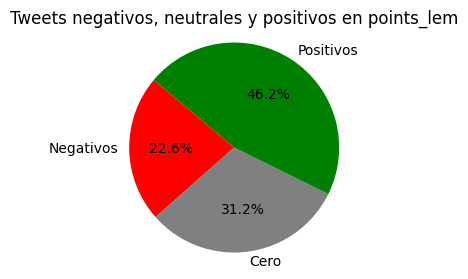

In [ ]:
negativos = (df['points_lem'] < 0).sum()
cero = (df['points_lem'] == 0).sum()
positivos = (df['points_lem'] > 0).sum()

etiquetas = ['Negativos', 'Cero', 'Positivos']
datos = [negativos, cero, positivos]
colores = ['red', 'grey', 'green']

# Crear Pie Chart
plt.figure(figsize=(4, 3))
plt.pie(datos, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140)
plt.title('Tweets negativos, neutrales y positivos en points_lem')
plt.axis('equal')  # Hace que el gráfico sea circular
plt.show()

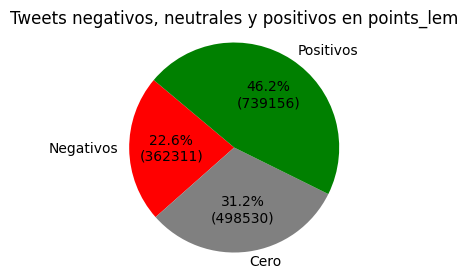

In [ ]:
negativos = (df['points_lem'] < 0).sum()
cero = (df['points_lem'] == 0).sum()
positivos = (df['points_lem'] > 0).sum()

etiquetas = ['Negativos', 'Cero', 'Positivos']
datos = [negativos, cero, positivos]
colores = ['red', 'grey', 'green']

# Crear Pie Chart
plt.figure(figsize=(4, 3))
plt.pie(datos, labels=etiquetas, colors=colores, autopct=lambda p: '{:.1f}%\n({:d})'.format(p, int(p * sum(datos) / 100)), startangle=140)
plt.title('Tweets negativos, neutrales y positivos en points_lem')
plt.axis('equal')  # Hace que el gráfico sea circular
plt.show()

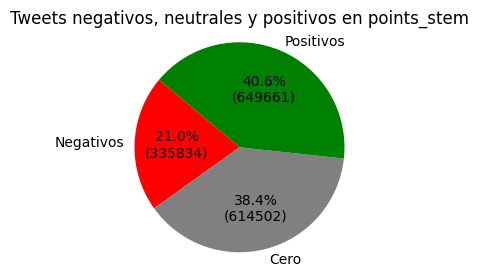

In [ ]:
negativos = (df['points_stem'] < 0).sum()
cero = (df['points_stem'] == 0).sum()
positivos = (df['points_stem'] > 0).sum()

etiquetas = ['Negativos', 'Cero', 'Positivos']
datos = [negativos, cero, positivos]
colores = ['red', 'grey', 'green']

# Crear Pie Chart
plt.figure(figsize=(4, 3))
plt.pie(datos, labels=etiquetas, colors=colores, autopct=lambda p: '{:.1f}%\n({:d})'.format(p, int(p * sum(datos) / 100)), startangle=140)
plt.title('Tweets negativos, neutrales y positivos en points_stem')
plt.axis('equal')  # Hace que el gráfico sea circular
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def calcular_longitud(texto):
    palabras = nltk.word_tokenize(texto)
    return len(palabras)

def calcular_diversidad_lexica(texto):
    palabras = nltk.word_tokenize(texto)
    palabras_unicas = set(palabras)
    if len(palabras) == 0:
      diversidad_lexica = 0
    else:
      diversidad_lexica = len(palabras_unicas) / len(palabras)

    return diversidad_lexica

df['diversity_lem'] = df['stemmed_text'].apply(calcular_diversidad_lexica)
df['diversity_stem'] = df['lematized_text'].apply(calcular_diversidad_lexica)
df['longitud_lem'] = df['lematized_text'].apply(calcular_longitud)
df['longitud_stem'] = df['stemmed_text'].apply(calcular_longitud)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df.head()

,points,id,date,search,user,cleaned_text,tokenized_text,lematized_text,stemmed_text,points_lem,points_stem,diversity_lem,diversity_stem,longitud_lem,longitud_stem
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,upset cant update facebook texting might cry r...,upset cant updat facebook text might cri resul...,-4,-2,1.0,1.0,12,12
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,i dived many times for the ball managed to sav...,dived many times ball managed save rest go bounds,dived many time ball managed save rest go bound,dive mani time ball manag save rest go bound,2,2,1.0,1.0,9,9
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,whole body feel itchy like fire,whole bodi feel itchi like fire,-1,0,1.0,1.0,6,6
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i her...,behaving im mad cant see,behaving im mad cant see,behav im mad cant see,-2,-2,1.0,1.0,5,5
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,not the whole crew,whole crew,whole crew,whole crew,0,0,1.0,1.0,2,2


Coeficiente de correlación entre diversity_lem y points_lem: -0.005305037096272493
Coeficiente de correlación entre diversity_stem y points_stem: -0.006265023303434058
Coeficiente de correlación entre longitud_lem y points_lem: 0.11683805265841983
Coeficiente de correlación entre longitud_stem y points_stem: 0.11593136542678646


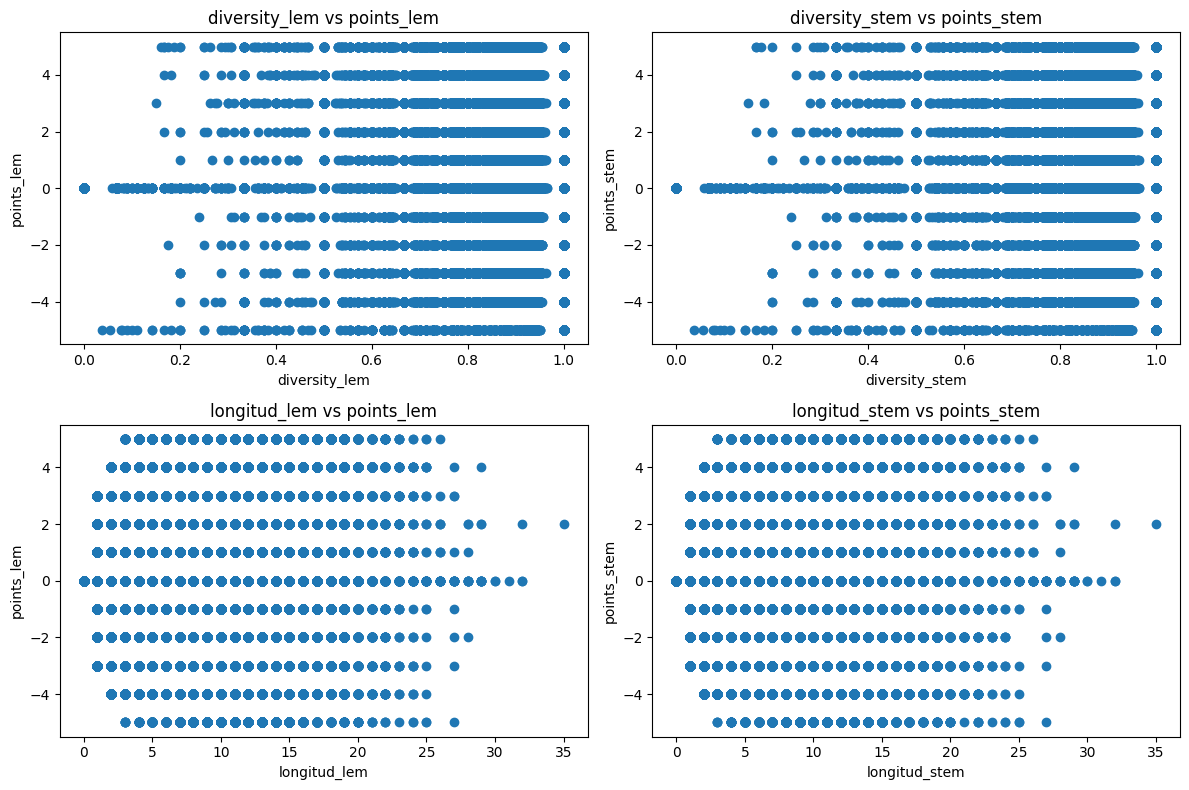

**PUNTO 2**

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Descargar los recursos necesarios de NLTK (puedes omitir este paso si ya los tienes descargados)
nltk.download('punkt')
nltk.download('stopwords')

# Tokenización y limpieza de texto
def limpiar_texto(texto):
    palabras = word_tokenize(texto)  # Tokenización y convertir a minúsculas
    listado = [token for token in palabras]
    return listado

# Agrupar los tweets por polaridad
tweets_positivos_lem = ' '.join(df[df['points_lem'] > 0]['lematized_text'])
tweets_negativos_lem = ' '.join(df[df['points_lem'] < 0]['lematized_text'])

# Tokenización y limpieza de texto para tweets positivos y negativos
tokens_positivos_lem = limpiar_texto(tweets_positivos_lem)
tokens_negativos_lem = limpiar_texto(tweets_negativos_lem)

# Análisis de frecuencia de palabras
frecuencia_positivos_lem = Counter(tokens_positivos_lem)
frecuencia_negativos_lem = Counter(tokens_negativos_lem)

# Identificación de las palabras más frecuentes en cada grupo
palabras_comunes_positivas_lem = frecuencia_positivos_lem.most_common(10)
palabras_comunes_negativas_lem = frecuencia_negativos_lem.most_common(10)

# Imprimir los resultados
print("Palabras más comunes en tweets positivos:", palabras_comunes_positivas_lem)
print("Palabras más comunes en tweets negativos:", palabras_comunes_negativas_lem)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Palabras más comunes en tweets positivos: [('im', 84217), ('good', 78634), ('love', 63373), ('day', 58358), ('like', 58296), ('lol', 46510), ('get', 42069), ('u', 39497), ('thanks', 37066), ('well', 36034)]
Palabras más comunes en tweets negativos: [('im', 54253), ('miss', 21745), ('sad', 21201), ('day', 20992), ('dont', 20488), ('get', 20443), ('bad', 19989), ('go', 18452), ('hate', 18300), ('ill', 17778)]


In [ ]:
# Save df
ruta_base = '/content/drive/MyDrive/Analitica_de_Datos/'
df.to_csv(os.path.join(ruta_base, "stemmed_lemmatized02.csv"), index=False)

**PUNTO 3**

Cargamos el dataset inicial nuevamente para recuperar los nombres de usuarios y obtener el número de seguidores

In [10]:
df_initial = pd.read_csv(ruta_base + 'training.1600000.processed.noemoticon.csv')
df_initial.columns = ['points', 'id', 'date', 'search', 'user', 'text']

In [11]:
def extract_username(text):
    # Regular expression to match word after '@'
    pattern = r'@(\w+)'
    match = re.search(pattern, text)
    if match:
        return match.group(1)
    else:
        return None

# Apply function to extract usernames
df_initial['username'] = df_initial['text'].apply(extract_username)

In [12]:
df_initial.head()

,points,id,date,search,user,text,username
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,None
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Kenichan
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,None
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,Kwesidei


In [13]:
nombre_counts_df = pd.DataFrame(df_initial['username'].value_counts())
nombre_counts_df = nombre_counts_df.rename(columns={'username':'Count'})
nombre_counts_df.head()

,count
username,
mileycyrus,4310
tommcfly,3767
ddlovato,3259
DavidArchie,1245
Jonasbrothers,1238


In [14]:
nombre_counts_df.reset_index(inplace=True)
nombre_counts_df = nombre_counts_df.rename(columns={'username':'user'})

In [15]:
# Read df
df = pd.read_csv(ruta_base + "stemmed_lemmatized02.csv")
df.head()

,points,id,date,search,user,cleaned_text,tokenized_text,lematized_text,stemmed_text,points_lem,points_stem,diversity_lem,diversity_stem,longitud_lem,longitud_stem
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,upset cant update facebook texting might cry r...,upset cant updat facebook text might cri resul...,-4,-2,1.0,1.0,12,12
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,i dived many times for the ball managed to sav...,dived many times ball managed save rest go bounds,dived many time ball managed save rest go bound,dive mani time ball manag save rest go bound,2,2,1.0,1.0,9,9
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,whole body feel itchy like fire,whole bodi feel itchi like fire,-1,0,1.0,1.0,6,6
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i her...,behaving im mad cant see,behaving im mad cant see,behav im mad cant see,-2,-2,1.0,1.0,5,5
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,not the whole crew,whole crew,whole crew,whole crew,0,0,1.0,1.0,2,2


In [16]:
merged_df = pd.merge(df, nombre_counts_df, on='user', how='left')

In [17]:
merged_df = merged_df.rename(columns={'count':'numero_seguidores'})

In [18]:
merged_df.head()

,points,id,date,search,user,cleaned_text,tokenized_text,lematized_text,stemmed_text,points_lem,points_stem,diversity_lem,diversity_stem,longitud_lem,longitud_stem,numero_seguidores
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,upset cant update facebook texting might cry r...,upset cant updat facebook text might cri resul...,-4,-2,1.0,1.0,12,12,2.0
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,i dived many times for the ball managed to sav...,dived many times ball managed save rest go bounds,dived many time ball managed save rest go bound,dive mani time ball manag save rest go bound,2,2,1.0,1.0,9,9,34.0
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,whole body feel itchy like fire,whole bodi feel itchi like fire,-1,0,1.0,1.0,6,6,1.0
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i her...,behaving im mad cant see,behaving im mad cant see,behav im mad cant see,-2,-2,1.0,1.0,5,5,7.0
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,not the whole crew,whole crew,whole crew,whole crew,0,0,1.0,1.0,2,2,NaN


In [19]:
polaridad_promedio_por_usuario = merged_df.groupby('user')['points_lem'].mean().reset_index()
polaridad_promedio_por_usuario

,user,points_lem
0,000catnap000,0.666667
1,000matthewkelly,4.000000
2,000yea000,3.000000
3,0010x0010,2.000000
4,001BabyGirl,1.000000
...,...,...
659770,zzztar,1.000000
659771,zzzum,4.000000
659772,zzzunzinnn,0.666667
659773,zzzyourdreamzzz,0.000000


In [20]:
polaridad_promedio_por_usuario_seguidores = merged_df.groupby('user')['numero_seguidores'].mean().reset_index()
polaridad_promedio_por_usuario_seguidores

,user,numero_seguidores
0,000catnap000,NaN
1,000matthewkelly,NaN
2,000yea000,NaN
3,0010x0010,1.0
4,001BabyGirl,NaN
...,...,...
659770,zzztar,NaN
659771,zzzum,1.0
659772,zzzunzinnn,NaN
659773,zzzyourdreamzzz,NaN


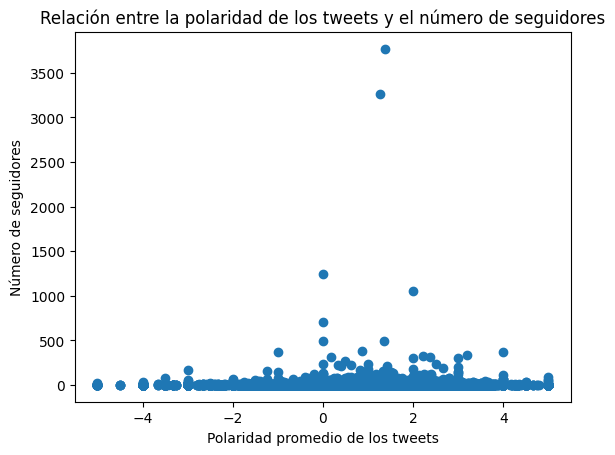

Usuarios con polaridad más positiva:
                 user  points_lem
29735     BonnieDCFan    5.000000
15453   Animelover111    5.000000
333102         daryak    5.000000
15530       Anitajb20    5.000000
15528     Anitabaxter    5.000000
...               ...         ...
522498     newO_nyboR    0.028571
268711         annzoo    0.027027
162836     MzMonaLisa    0.027027
459995        laubow_    0.027027
24180   BeantownCutie    0.015152

[335341 rows x 2 columns]

Usuarios con polaridad más negativa:
                  user  points_lem
493378         meeeels   -5.000000
475632   lovemyguitar7   -5.000000
16551           Antfan   -5.000000
179126        Poetsjie   -5.000000
501837        milincai   -5.000000
...                ...         ...
509784          monnie   -0.028571
395064   hyper_baffoon   -0.027778
17671   ArieleMoonfire   -0.022727
260477   amazingphoebe   -0.012658
476946     luckygnahhh   -0.008333

[156879 rows x 2 columns]


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Relacionar la polaridad con el número de seguidores
plt.scatter(polaridad_promedio_por_usuario['points_lem'], polaridad_promedio_por_usuario_seguidores['numero_seguidores'])
plt.xlabel('Polaridad promedio de los tweets')
plt.ylabel('Número de seguidores')
plt.title('Relación entre la polaridad de los tweets y el número de seguidores')
plt.show()

# Identificar usuarios con polaridades extremas
usuarios_positivos = polaridad_promedio_por_usuario[polaridad_promedio_por_usuario['points_lem'] > 0]
usuarios_negativos = polaridad_promedio_por_usuario[polaridad_promedio_por_usuario['points_lem'] < 0]

print("Usuarios con polaridad más positiva:")
print(usuarios_positivos.sort_values(by='points_lem', ascending=False))

print("\nUsuarios con polaridad más negativa:")
print(usuarios_negativos.sort_values(by='points_lem'))

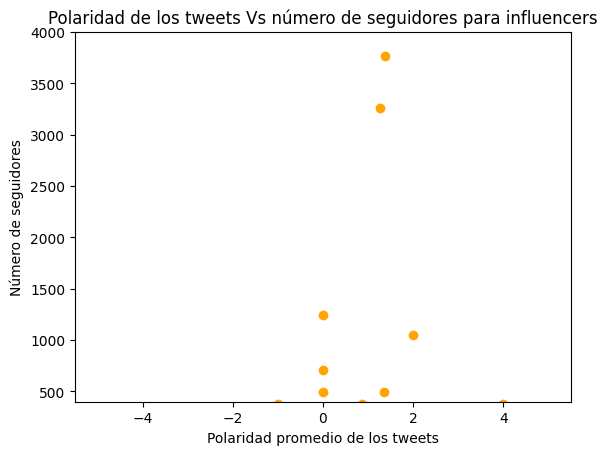

In [34]:
# Relacionar la polaridad con el número de seguidores desde 400 seguidores
plt.scatter(polaridad_promedio_por_usuario['points_lem'], polaridad_promedio_por_usuario_seguidores['numero_seguidores'], color='orange')
plt.xlabel('Polaridad promedio de los tweets')
plt.ylabel('Número de seguidores')
plt.title('Polaridad de los tweets Vs número de seguidores para influencers')
plt.ylim(400, 4000)
plt.show()

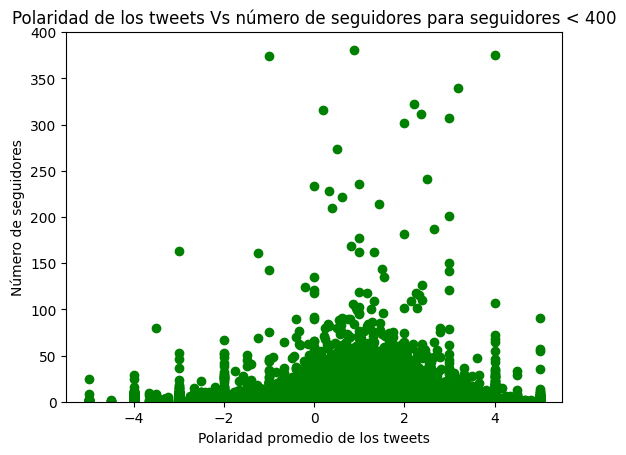

In [35]:
# Relacionar la polaridad con el número de seguidores hasta 400 seguidores
plt.scatter(polaridad_promedio_por_usuario['points_lem'], polaridad_promedio_por_usuario_seguidores['numero_seguidores'], color='green')
plt.xlabel('Polaridad promedio de los tweets')
plt.ylabel('Número de seguidores')
plt.title('Polaridad de los tweets Vs número de seguidores para seguidores < 400')
plt.ylim(0, 400)
plt.show()

**CONCLUSION: NO HAY CORRELACION ENTRE LA POLARIDAD PROMEDIO Y EL NUMERO DE SEGUIDORES PROMEDIO DE LOS USUARIOS**


**PUNTO 4**

In [56]:
# Read df
df = pd.read_csv(ruta_base + "stemmed_lemmatized02.csv")
df.head()

,points,id,date,search,user,cleaned_text,tokenized_text,lematized_text,stemmed_text,points_lem,points_stem,diversity_lem,diversity_stem,longitud_lem,longitud_stem
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,upset cant update facebook texting might cry r...,upset cant updat facebook text might cri resul...,-4,-2,1.0,1.0,12,12
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,i dived many times for the ball managed to sav...,dived many times ball managed save rest go bounds,dived many time ball managed save rest go bound,dive mani time ball manag save rest go bound,2,2,1.0,1.0,9,9
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,whole body feel itchy like fire,whole bodi feel itchi like fire,-1,0,1.0,1.0,6,6
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i her...,behaving im mad cant see,behaving im mad cant see,behav im mad cant see,-2,-2,1.0,1.0,5,5
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,not the whole crew,whole crew,whole crew,whole crew,0,0,1.0,1.0,2,2


In [57]:
# Seleccionar filas por temas
df = df.dropna(subset=['lematized_text'])
obama_lematized = df[df['lematized_text'].str.contains('obama', case=False)]
obama_stemmed = df[df['stemmed_text'].str.contains('obama', case=False)]

# Resetear los índices para que los DataFrames se comparen correctamente
obama_lematized = obama_lematized.reset_index(drop=True)
obama_stemmed = obama_stemmed.reset_index(drop=True)

# Comparar los DataFrames
if obama_lematized.equals(obama_stemmed):
    print("Los DataFrames son iguales.")
    obama = obama_lematized
    obama = obama_stemmed
else:
    print("Los DataFrames son diferentes.")

Los DataFrames son iguales.


In [61]:
import nltk
nltk.download('punkt')
# Definir las palabras específicas a contar
palabras_positivas = ['good', 'love', 'like', 'lol', 'thanks', 'well']
palabras_negativas = ['sad', 'dont', 'bad', 'hate', 'ill']

# Tokenizar los textos de obama['lematized_text'] y df['lematized_text']
obama_tokenizado = nltk.word_tokenize(' '.join(obama['lematized_text']))
df_tokenizado = nltk.word_tokenize(' '.join(df['lematized_text']))

# Calcular la frecuencia de las palabras específicas en cada conjunto de texto
frecuencia_obama_positivo = {palabra: obama_tokenizado.count(palabra) for palabra in palabras_positivas}
frecuencia_df_positivo = {palabra: df_tokenizado.count(palabra) for palabra in palabras_positivas}
frecuencia_obama_negativo = {palabra: obama_tokenizado.count(palabra) for palabra in palabras_negativas}
frecuencia_df_negativo = {palabra: df_tokenizado.count(palabra) for palabra in palabras_positivas}

# Calcular el porcentaje de cada palabra específica en relación con el total de palabras en cada conjunto de texto
porcentaje_obama_positivo = {palabra: (frecuencia / len(obama_tokenizado)) * 100 for palabra, frecuencia in frecuencia_obama_positivo.items()}
porcentaje_df_positivo = {palabra: (frecuencia / len(df_tokenizado)) * 100 for palabra, frecuencia in frecuencia_df_positivo.items()}
porcentaje_obama_negativo = {palabra: (frecuencia / len(obama_tokenizado)) * 100 for palabra, frecuencia in frecuencia_obama_negativo.items()}
porcentaje_df_negativo = {palabra: (frecuencia / len(df_tokenizado)) * 100 for palabra, frecuencia in frecuencia_df_negativo.items()}

# Mostrar los resultados
print("Porcentaje de palabras positivas en obama['lematized_text']:")
for palabra, porcentaje in porcentaje_obama_positivo.items():
    print(f"{palabra}: {porcentaje:.2f}%")

print("\nPorcentaje de palabras positivas en df['lematized_text']:")
for palabra, porcentaje in porcentaje_df_positivo.items():
    print(f"{palabra}: {porcentaje:.2f}%")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Porcentaje de palabras positivas en obama['lematized_text']:
good: 0.22%
love: 0.55%
like: 0.77%
lol: 0.26%
thanks: 0.12%
well: 0.12%

Porcentaje de palabras positivas en df['lematized_text']:
good: 0.77%
love: 0.57%
like: 0.68%
lol: 0.47%
thanks: 0.34%
well: 0.38%


Porcentaje de textos con palabras positivas en obama['lematized_text']: 22.34%
Porcentaje de textos con palabras positivas en df['lematized_text']: 22.74%
Porcentaje de textos con palabras negativas en obama['lematized_text']: 19.00%
Porcentaje de textos con palabras negativas en df['lematized_text']: 15.96%


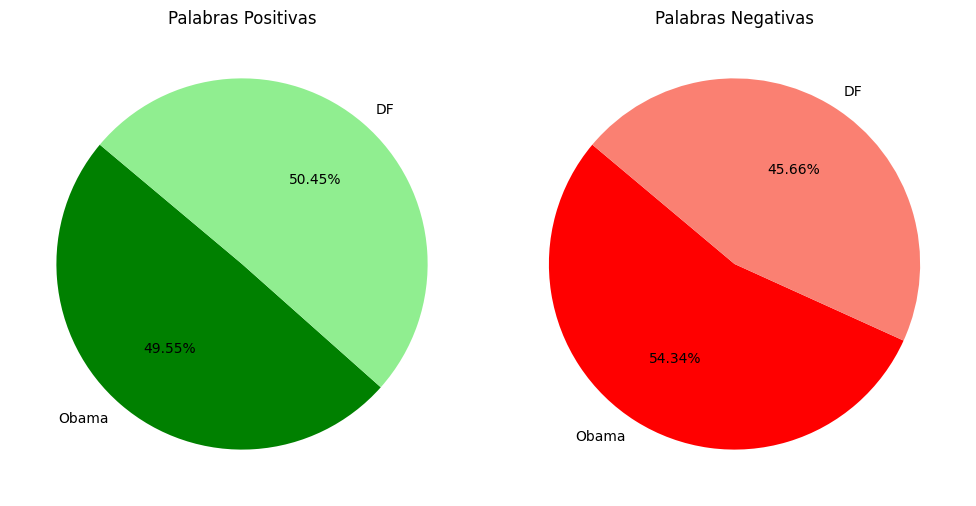

In [62]:
# Definir las palabras específicas a contar
palabras_positivas = ['good', 'love', 'like', 'lol', 'thanks', 'well']
palabras_negativas = ['sad', 'dont', 'bad', 'hate', 'ill']

# Inicializar contadores
contador_obama_positivo = 0
contador_df_positivo = 0
contador_obama_negativo = 0
contador_df_negativo = 0

# Iterar sobre cada texto en obama['lematized_text'] y df['lematized_text']
for texto in obama['lematized_text']:
    if any(palabra in texto for palabra in palabras_positivas):
        contador_obama_positivo += 1
    if any(palabra in texto for palabra in palabras_negativas):
        contador_obama_negativo += 1

for texto in df['lematized_text']:
    if any(palabra in texto for palabra in palabras_positivas):
        contador_df_positivo += 1
    if any(palabra in texto for palabra in palabras_negativas):
        contador_df_negativo += 1

# Calcular el porcentaje de textos que contienen al menos una palabra positiva o negativa en cada conjunto
total_textos_obama = len(obama)
total_textos_df = len(df)
porcentaje_obama_positivo = (contador_obama_positivo / total_textos_obama) * 100
porcentaje_df_positivo = (contador_df_positivo / total_textos_df) * 100
porcentaje_obama_negativo = (contador_obama_negativo / total_textos_obama) * 100
porcentaje_df_negativo = (contador_df_negativo / total_textos_df) * 100

# Mostrar los resultados
print("Porcentaje de textos con palabras positivas en obama['lematized_text']:", "{:.2f}%".format(porcentaje_obama_positivo))
print("Porcentaje de textos con palabras positivas en df['lematized_text']:", "{:.2f}%".format(porcentaje_df_positivo))
print("Porcentaje de textos con palabras negativas en obama['lematized_text']:", "{:.2f}%".format(porcentaje_obama_negativo))
print("Porcentaje de textos con palabras negativas en df['lematized_text']:", "{:.2f}%".format(porcentaje_df_negativo))

# Crear piechart para palabras positivas
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie([porcentaje_obama_positivo, porcentaje_df_positivo], labels=['Obama', 'DF'], autopct='%1.2f%%', startangle=140, colors=['green', 'lightgreen'])
plt.title('Palabras Positivas')

# Crear piechart para palabras negativas
plt.subplot(1, 2, 2)
plt.pie([porcentaje_obama_negativo, porcentaje_df_negativo], labels=['Obama', 'DF'], autopct='%1.2f%%', startangle=140, colors=['red', 'salmon'])
plt.title('Palabras Negativas')

plt.tight_layout()
plt.show()

**PUNTO 4B**

In [67]:
# Dataset con solo datos de Obama
obama_lematized = df[df['lematized_text'].str.contains('obama', case=False)]

# Encontrar la media de puntuaciones de los usuarios que hablan sobre Obama
user_points = obama_lematized.groupby('user')['points_lem'].mean().reset_index()
user_points

,user,points_lem
0,1flyharmony,0.0
1,2bluntcc,0.0
2,3plus_talents,0.0
3,AJCann,0.0
4,AVocalistsRival,2.0
...,...,...
455,xzozoxmwah17x,1.0
456,yador,3.0
457,yolandagrace,1.0
458,youngsinick,0.0


In [71]:
def classify_polarity(score):
    if score > 0:
        return 'Positivo'
    elif score < 0:
        return 'Negativo'
    else:
        return 'Neutro'

user_points['polarity_class'] = user_points['points_lem'].apply(classify_polarity)
usuarios_por_polaridad = user_points.groupby('polarity_class')['user'].apply(list).reset_index()

In [70]:
# Imprimir los usuarios según la polaridad de los puntos
for polaridad in usuarios_por_polaridad['polarity_class']:
    usuarios = ', '.join(usuarios_por_polaridad[usuarios_por_polaridad['polarity_class'] == polaridad]['user'].iloc[0])
    print(f"Usuarios con puntos {polaridad.lower()}s: {usuarios}")

Usuarios con puntos negativos: AmeriVibe, Avril4everr, BuzzzDog, CKBahr, DevineNews, GeminiJS, GravyFloid, JessDefilippo, JessiJaeJoplin, JosephTexDozier, Lastoadri, Mgh234, Mstamps, Mysticamore, Only1Emari, Orchidbuy, Sano_Sagara, SloRunnerMom, Squishyjello, StageKid, _caitlynp_, aaronstroud, ac1dr41n, adamheitke, alfie_whinyard, americandream09, annzah, archistar, augustine25, bigenya, blackmamba1, blooopp, bobbert_, chatwithchuck, chris_herrala, christinakb, coebooth, computer_kyle, craig_hurst, daphneyb, davewark, dexuk, drdobie, elvisofdallas, germanfrank, ginayun, gmt903, hailerivera, jennifer920, joshuaseo, judz_ens, keya_dragon, krisweetie385, lizasperling, msangeline, nightmehxo, onemorebite, oreth, politicomocha, pramsey, randomfella, recombobulated, sabernar, sallismoney, seandeardorff, secret_dancer, shamandawow, shawntempesta, smagar, soitscometothis, tallblonde87, thedirtydb, treclubsgrho, tussius, tysontrimble, undoodle, urabore, winnerandy, xkilljoyx, xo_esmeralda_xo
Us

In [63]:
from sklearn.cluster import KMeans

obama_lematized['sentimiento'] = obama_lematized['points_lem'].apply(lambda x: 'positivo' if x >= 0 else 'negativo')
usuarios_por_sentimiento = obama_lematized.groupby('user')['sentimiento'].first().reset_index()
X = pd.get_dummies(usuarios_por_sentimiento['sentimiento'])
num_clusters = 2  # Hay dos categorías: positivo y negativo
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
usuarios_por_sentimiento['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [64]:
print(usuarios_por_sentimiento)

                user sentimiento  cluster
0        1flyharmony    positivo        0
1           2bluntcc    positivo        0
2      3plus_talents    positivo        0
3             AJCann    positivo        0
4    AVocalistsRival    positivo        0
..               ...         ...      ...
455    xzozoxmwah17x    positivo        0
456            yador    positivo        0
457     yolandagrace    positivo        0
458      youngsinick    positivo        0
459     zyozyfounder    positivo        0

[460 rows x 3 columns]


**PUNTO 5**

In [40]:
df['date'] = pd.to_datetime(df['date'])

# Obtener los valores únicos del mes
df['date'].dt.month.unique()

array([4, 5, 6], dtype=int32)

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


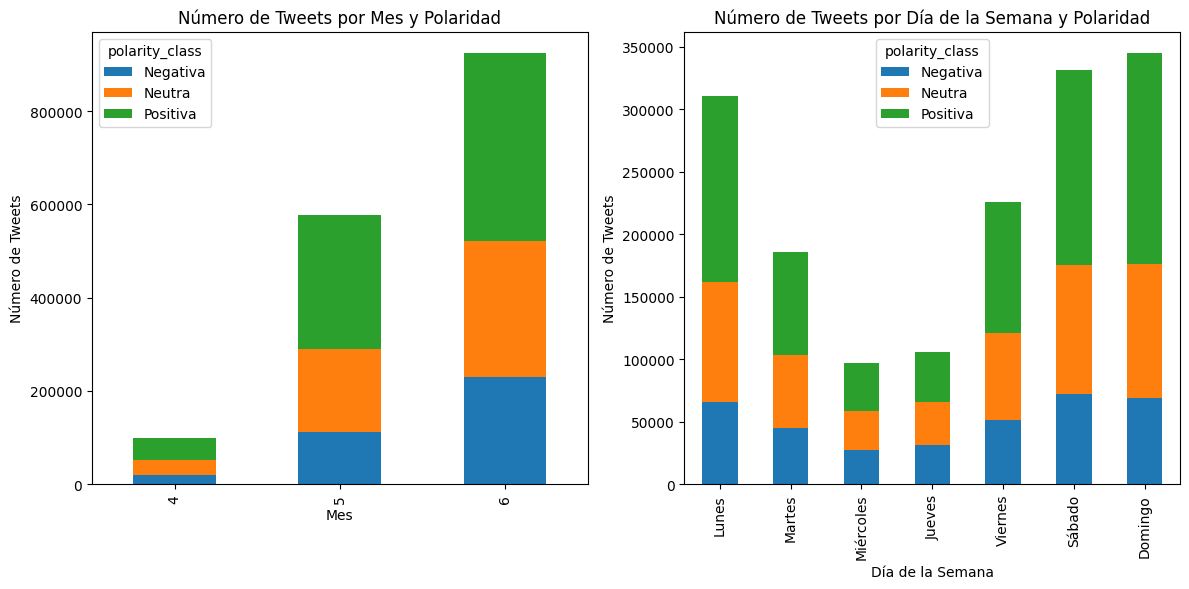

In [38]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

def classify_polarity(score):
    if score > 0:
        return 'Positiva'
    elif score < 0:
        return 'Negativa'
    else:
        return 'Neutra'

merged_df['polarity_class'] = merged_df['points_lem'].apply(classify_polarity)

merged_df['month'] = merged_df['date'].dt.month
merged_df['day_of_week'] = merged_df['date'].dt.dayofweek  # Lunes=0, Domingo=6

count_by_month = merged_df.groupby(['month', 'polarity_class']).size().unstack(fill_value=0)
count_by_day_of_week = merged_df.groupby(['day_of_week', 'polarity_class']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
count_by_month.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Número de Tweets por Mes y Polaridad')
plt.xlabel('Mes')
plt.ylabel('Número de Tweets')

plt.subplot(1, 2, 2)
count_by_day_of_week.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Número de Tweets por Día de la Semana y Polaridad')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Tweets')
plt.xticks(range(7), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

plt.tight_layout()
plt.show()


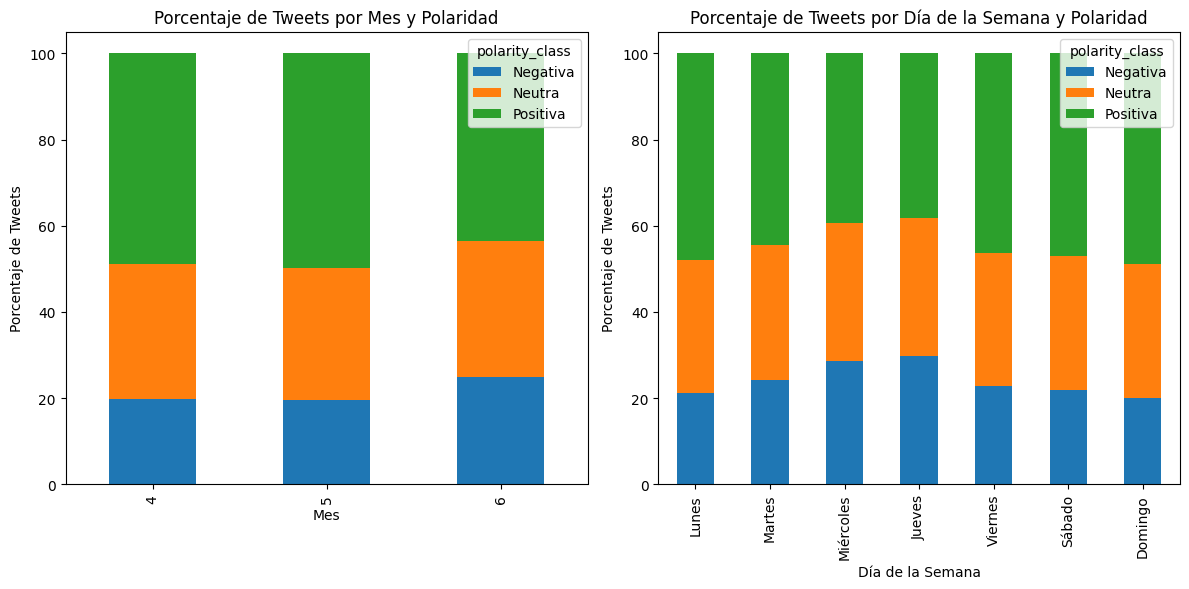

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'date' al formato de fecha
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Definir una función para clasificar la polaridad
def classify_polarity(score):
    if score > 0:
        return 'Positiva'
    elif score < 0:
        return 'Negativa'
    else:
        return 'Neutra'

# Aplicar la función para clasificar la polaridad y crear una nueva columna 'polarity_class'
merged_df['polarity_class'] = merged_df['points_lem'].apply(classify_polarity)

# Extraer el mes y el día de la semana de la fecha
merged_df['month'] = merged_df['date'].dt.month
merged_df['day_of_week'] = merged_df['date'].dt.dayofweek  # Lunes=0, Domingo=6

# Calcular el número de tweets por mes y polaridad
count_by_month = merged_df.groupby(['month', 'polarity_class']).size().unstack(fill_value=0)

# Calcular el porcentaje de tweets por mes y polaridad
percentage_by_month = count_by_month.div(count_by_month.sum(axis=1), axis=0) * 100

# Calcular el número de tweets por día de la semana y polaridad
count_by_day_of_week = merged_df.groupby(['day_of_week', 'polarity_class']).size().unstack(fill_value=0)

# Calcular el porcentaje de tweets por día de la semana y polaridad
percentage_by_day_of_week = count_by_day_of_week.div(count_by_day_of_week.sum(axis=1), axis=0) * 100

# Graficar los resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
percentage_by_month.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Porcentaje de Tweets por Mes y Polaridad')
plt.xlabel('Mes')
plt.ylabel('Porcentaje de Tweets')

plt.subplot(1, 2, 2)
percentage_by_day_of_week.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Porcentaje de Tweets por Día de la Semana y Polaridad')
plt.xlabel('Día de la Semana')
plt.ylabel('Porcentaje de Tweets')
plt.xticks(range(7), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

plt.tight_layout()
plt.show()


**PUNTO 6**

In [ ]:
# Calcular métricas relevantes como la frecuencia de publicaciones y el número de seguidores
user_metrics = merged_df.groupby('user').agg({
    'id': 'count',  # número de publicaciones por usuario
    'numero_seguidores': 'max'  # máximo número de seguidores por usuario
}).rename(columns={'id': 'publicaciones'})


negative_posts = merged_df[merged_df['points_lem'] < 0]
negative_posts_count = negative_posts.groupby('user').size().reset_index(name='negative_posts_count')

top_trolls = negative_posts_count.sort_values(by='negative_posts_count', ascending=False).head(10)

# Asignar pesos a cada métrica
peso_publicaciones = 0.4
peso_seguidores = 0.6

# Calcular puntaje ponderado para cada usuario
user_metrics['score'] = (user_metrics['publicaciones'] * peso_publicaciones) + (user_metrics['numero_seguidores'] * peso_seguidores)

# Ordenar los usuarios según el puntaje ponderado
top_influencers = user_metrics.sort_values(by='score', ascending=False).head(10)

print("\nTop 10 Influencers (Ponderado):")
print(top_influencers)

print("\nTop 10 Trolls:")
print(top_trolls)


Top 10 Influencers (Ponderado):
                publicaciones  numero_seguidores   score
user                                                    
tommcfly                    8             3767.0  2263.4
ddlovato                   11             3259.0  1959.8
DavidArchie                 1             1245.0   747.4
DonnieWahlberg              1             1054.0   632.8
selenagomez                 1              708.0   425.2
shaundiviney               20              490.0   302.0
YoungQ                      3              490.0   295.2
officialTila                8              381.0   231.8
iamdiddy                    1              375.0   225.4
ashleytisdale               1              374.0   224.8

Top 10 Trolls:
                   user  negative_posts_count
229464          webwoke                   241
231146           wowlew                   210
111052         chaosbot                    86
229823      what_bugs_u                    84
175866      mcraddictal              

In [ ]:
# Save df
ruta_base = '/content/drive/MyDrive/Analitica_de_Datos/'
merged_df.to_csv(os.path.join(ruta_base, "stemmed_lemmatized_merged.csv"), index=False)

**VISUALIZACIÓN**

**PUNTO 1**

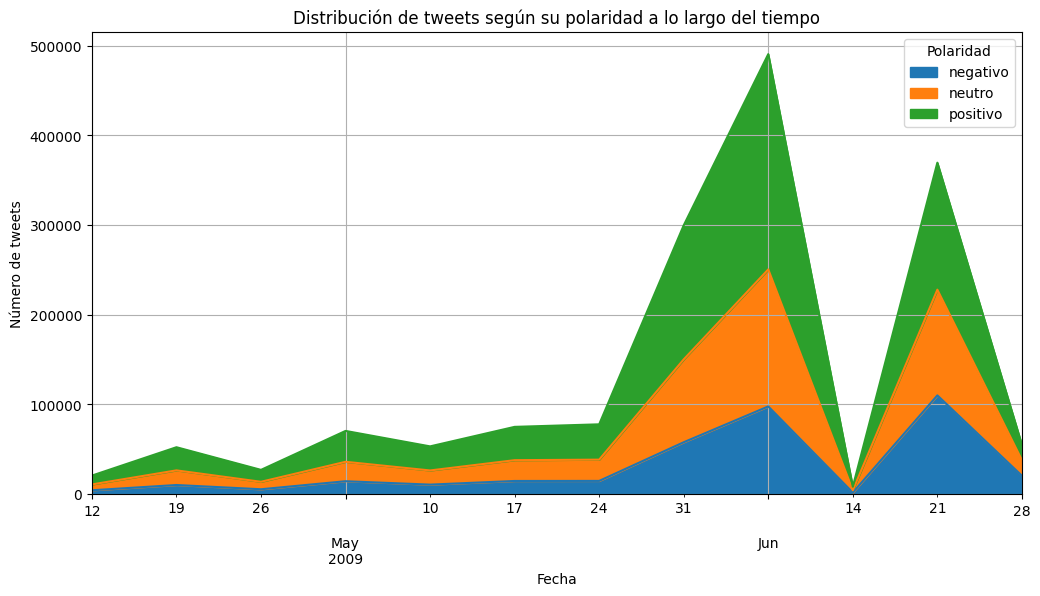

In [43]:
def categorizar_polaridad(polarity):
    if polarity < 0:
        return 'negativo'
    elif polarity == 0:
        return 'neutro'
    else:
        return 'positivo'

merged_df['polarity_category'] = merged_df['points_lem'].apply(categorizar_polaridad)

# Definir el intervalo de tiempo a semanalmente
intervalo_tiempo = 'W'

conteo_polaridad_tiempo = merged_df.groupby([pd.Grouper(key='date', freq=intervalo_tiempo), 'polarity_category']).size().unstack(fill_value=0)
conteo_polaridad_tiempo.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title('Distribución de tweets según su polaridad a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de tweets')
plt.legend(title='Polaridad')
plt.grid(True)
plt.show()

In [48]:
merged_df.head(2)

,points,id,date,search,user,cleaned_text,tokenized_text,lematized_text,stemmed_text,points_lem,points_stem,diversity_lem,diversity_stem,longitud_lem,longitud_stem,numero_seguidores,polarity_class,month,day_of_week,polarity_category
0,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,upset cant update facebook texting might cry r...,upset cant updat facebook text might cri resul...,-4,-2,1.0,1.0,12,12,2.0,Negativa,4,0,negativo
1,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,i dived many times for the ball managed to sav...,dived many times ball managed save rest go bounds,dived many time ball managed save rest go bound,dive mani time ball manag save rest go bound,2,2,1.0,1.0,9,9,34.0,Positiva,4,0,positivo


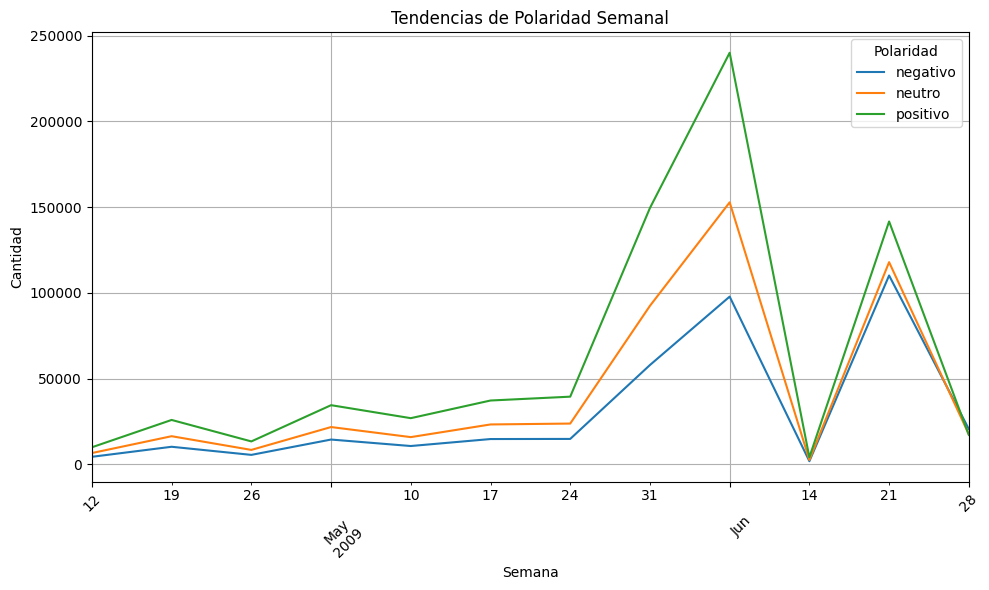

In [53]:
# Convertir la columna 'date' al formato de fecha
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Extraer el año y mes de la fecha para crear una columna 'Semana'
merged_df['Semana'] = merged_df['date'].dt.strftime('%b %W')

# Contar la cantidad de cada tipo de polaridad por semana
conteo_semanal = merged_df.groupby([pd.Grouper(key='date', freq=intervalo_tiempo), 'polarity_category']).size().unstack(fill_value=0)

# Graficar los resultados
conteo_semanal.plot(kind='line', figsize=(10, 6))
plt.title('Tendencias de Polaridad Semanal')
plt.xlabel('Semana')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Polaridad')
plt.tight_layout()
plt.show()

**PUNTO 2**

Part-of-Speech (POS) tagging is a preprocessing step in natural language processing (NLP) that involves assigning a grammatical category or part-of-speech label (such as noun, verb, adjective, etc.) to each word in a sentence.

10 POS a usar:

| Etiqueta POS | Significado                                |
|--------------|--------------------------------------------|
| NN           | Sustantivo singular o incontable           |
| VB           | Verbo base                                 |
| JJ           | Adjetivo                                   |
| RB           | Adverbio                                   |
| IN           | Preposición o conjunción subordinada       |
| PRP          | Pronombre personal                         |
| DT           | Determinante                               |
| CC           | Conjunción coordinada                      |
| VBG          | Verbo en gerundio                          |
| VBN          | Verbo en participio pasado                |

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


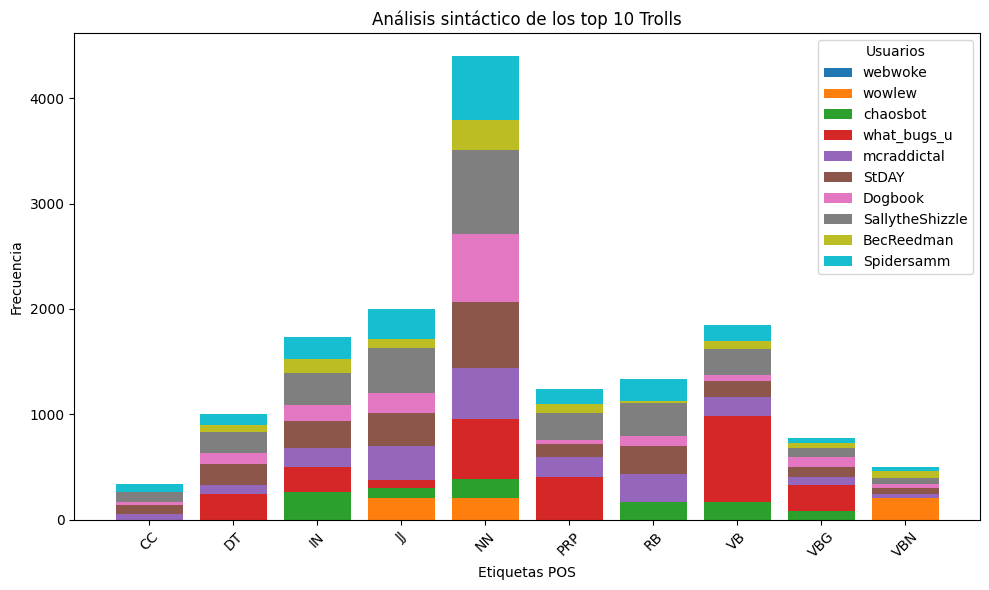

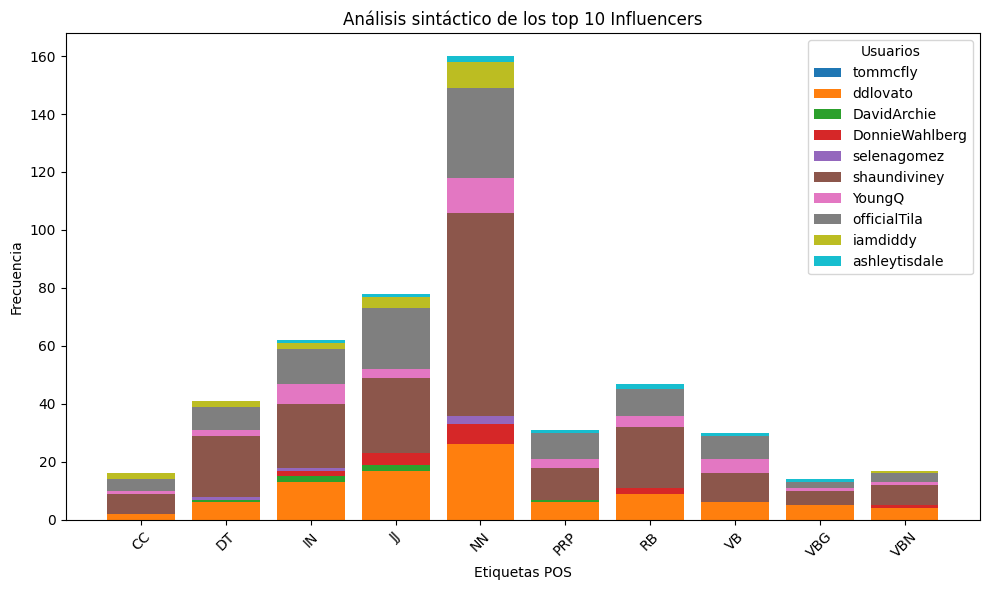

In [ ]:
# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def analisis_sintactico(texto):
    tokens = word_tokenize(texto)

    # Etiquetado POS (Part-of-Speech)
    pos_tags = pos_tag(tokens)

    # Se usaran los 10 tags POS a analizar
    etiquetas_pos_filtradas = ['NN', 'VB', 'JJ', 'RB', 'IN', 'PRP', 'DT', 'CC', 'VBG', 'VBN']
    pos_counter = Counter(tag for word, tag in pos_tags if tag in etiquetas_pos_filtradas)

    return pos_counter

# Función para mostrar el análisis sintáctico de los top 10 Trolls e Influencers
def mostrar_analisis_sintactico_grafica(top_users, title):
    pos_counts = {}

    for user in top_users:
        texto_usuario = merged_df[merged_df['user'] == user]['cleaned_text'].str.cat(sep=' ')
        pos_counts[user] = analisis_sintactico(texto_usuario)

    unique_pos_tags = sorted(set(tag for user_pos in pos_counts.values() for tag in user_pos))
    data = {user: [user_pos.get(pos, 0) for pos in unique_pos_tags] for user, user_pos in pos_counts.items()}

    plt.figure(figsize=(10, 6))
    bottom = None
    for user, counts in data.items():
        plt.bar(unique_pos_tags, counts, label=user, bottom=bottom)
        if bottom is None:
            bottom = [0] * len(counts)
        else:
            bottom = [sum(x) for x in zip(bottom, counts)]

    plt.title(title)
    plt.xlabel('Etiquetas POS')
    plt.ylabel('Frecuencia')
    plt.legend(title='Usuarios')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

top_trolls_users = top_trolls['user'].tolist()
top_influencers_users = top_influencers.index.tolist()

mostrar_analisis_sintactico_grafica(top_trolls_users, 'Análisis sintáctico de los top 10 Trolls')
mostrar_analisis_sintactico_grafica(top_influencers_users, 'Análisis sintáctico de los top 10 Influencers')

**PUNTO 3**

ES EL PUNTO 3 DEL APARTADO ANTERIOR, SOBRE LA CORRELACION ENTRE NUMERO DE SEGUIDORES Y POLARIDAD

**PUNTO 4**


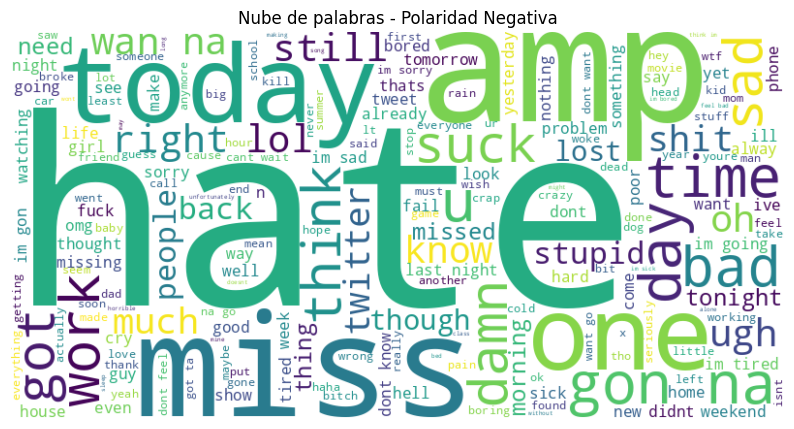

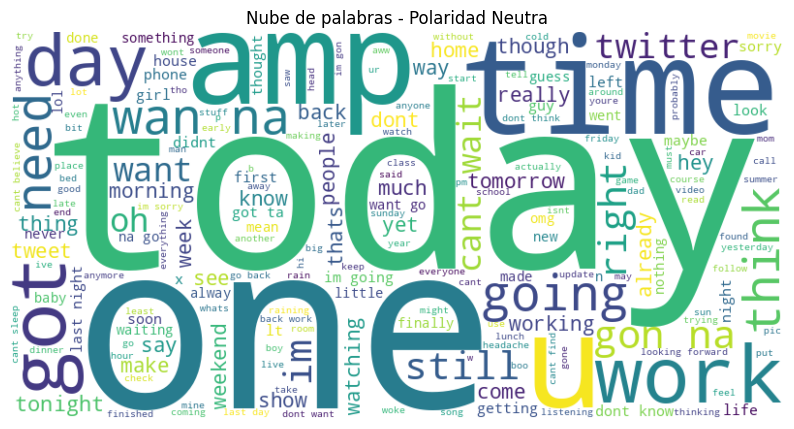

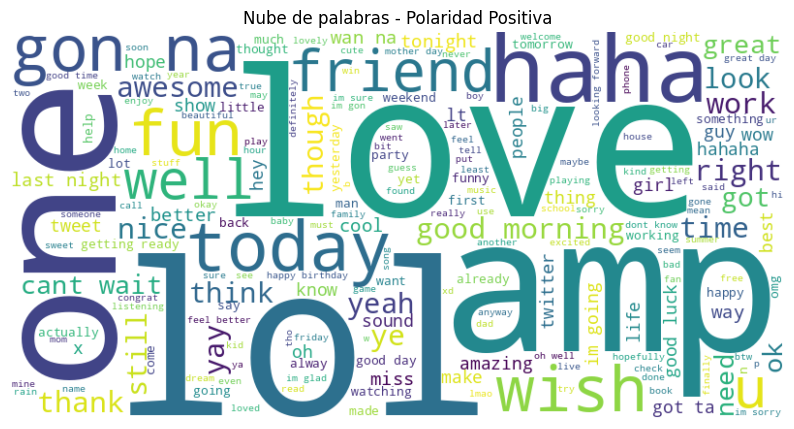

In [ ]:
from wordcloud import WordCloud

# Función para generar una nube de palabras
def generar_nube_palabras(texto, titulo):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(texto)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo)
    plt.show()

textos_polaridad_negativa = merged_df[merged_df['points_lem'] < 0]['lematized_text'].str.cat(sep=' ')
textos_polaridad_neutra = merged_df[merged_df['points_lem'] == 0]['lematized_text'].str.cat(sep=' ')
textos_polaridad_positiva = merged_df[merged_df['points_lem'] > 0]['lematized_text'].str.cat(sep=' ')

generar_nube_palabras(textos_polaridad_negativa, 'Nube de palabras - Polaridad Negativa')
generar_nube_palabras(textos_polaridad_neutra, 'Nube de palabras - Polaridad Neutra')
generar_nube_palabras(textos_polaridad_positiva, 'Nube de palabras - Polaridad Positiva')


**PUNTO 5**

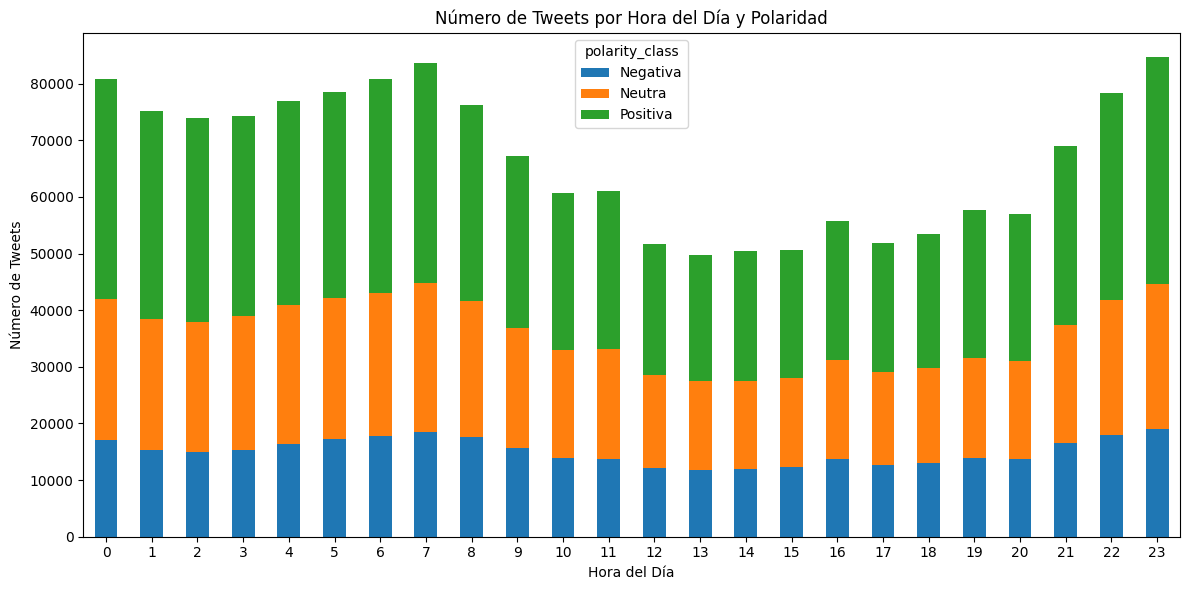

In [ ]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

def classify_polarity(score):
    if score > 0:
        return 'Positiva'
    elif score < 0:
        return 'Negativa'
    else:
        return 'Neutra'

merged_df['polarity_class'] = merged_df['points_lem'].apply(classify_polarity)

merged_df['hour'] = merged_df['date'].dt.hour  # Extraer la hora del día

count_by_hour = merged_df.groupby(['hour', 'polarity_class']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))

count_by_hour.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Número de Tweets por Hora del Día y Polaridad')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Tweets')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

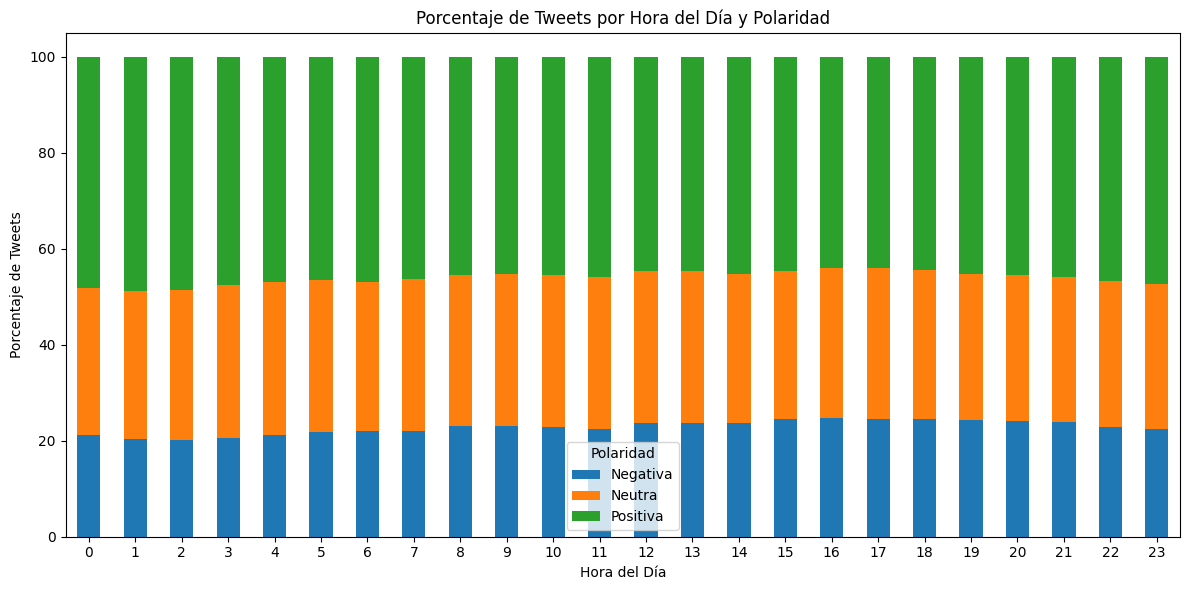

In [54]:
# Aplicar la función para clasificar la polaridad y crear una nueva columna 'polarity_class'
merged_df['polarity_class'] = merged_df['points_lem'].apply(classify_polarity)

# Extraer la hora del día de la fecha
merged_df['hour'] = merged_df['date'].dt.hour

# Contar la cantidad de tweets por hora del día y polaridad
count_by_hour = merged_df.groupby(['hour', 'polarity_class']).size().unstack(fill_value=0)

# Calcular los porcentajes
percentage_by_hour = count_by_hour.div(count_by_hour.sum(axis=1), axis=0) * 100

# Graficar los resultados en porcentajes
plt.figure(figsize=(12, 6))
percentage_by_hour.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Porcentaje de Tweets por Hora del Día y Polaridad')
plt.xlabel('Hora del Día')
plt.ylabel('Porcentaje de Tweets')
plt.xticks(rotation=0)
plt.legend(title='Polaridad')
plt.tight_layout()
plt.show()

**Vectorizador TF-IDF**

* Ajuste (fit): Este paso analiza los datos de entrada (en este caso, la columna 'lematized_text' de tu DataFrame df) para construir el vocabulario del corpus, es decir, crea un conjunto de todas las palabras únicas en tus textos lematizados y asigna un índice a cada una de ellas.

* Transformación (transform): Una vez que el vectorizador ha aprendido el vocabulario, transforma los textos en una representación vectorial utilizando el esquema TF-IDF. Cada fila de la matriz resultante representa un texto, y cada columna representa una palabra del vocabulario. Los valores en la matriz son los pesos TF-IDF correspondientes a cada palabra en cada texto.

* Asignación del resultado a tfidf_matrix: La matriz resultante de la transformación se asigna a la variable tfidf_matrix, que ahora contiene la representación vectorial TF-IDF de tus textos lematizados. Esta matriz se puede utilizar para realizar análisis posterior, como clustering, clasificación u otras tareas de procesamiento de texto.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializa el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Ajusta el vectorizador a los datos y transforma la columna lematizada en una matriz TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lematized_text'])

tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf.head(2)

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [ ]:
from gensim.models import Word2Vec

# Entrena el modelo Word2Vec
word2vec_model = Word2Vec(df['lematized_text'], vector_size=100, window=5, min_count=1, workers=4)

word_vectors = pd.DataFrame(word2vec_model.wv.vectors, index=word2vec_model.wv.index_to_key)
word_vectors.head(2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Inicializa el vectorizador BoW
bow_vectorizer = CountVectorizer()

# Ajusta el vectorizador a tus datos y transforma la columna lematizada en una matriz BoW
bow_matrix = bow_vectorizer.fit_transform(df['lematized_text'])

bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())
bow_df.head(2)

In [ ]:
from sklearn.cluster import KMeans

# Suponiendo que ya tienes tus datos representados como una matriz de características X

# Calcular la inercia para diferentes valores de k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Visualizar la curva de codo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

JA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline
